In [82]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import DBSCAN
import umap
import hdbscan
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from read_clustering.variant_call import VariantCalls, VariantCall
threshold = 0.5
np.random.seed(42)

In [31]:
ivt_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/canonical_ivt_round30_alt_canonical_supervised_500_500.model.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_YPD.csv"


In [32]:
file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, 
              WT_YPD]
labels = ["ivt_path", "cbf5_glu_psu_depletion_path", "nop58_glu_2o_depletion_path",
          "wt"]


In [33]:
vc = VariantCalls(file_paths, labels)


In [34]:
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]

In [35]:
pseduo_u_df = vc.get_positions_of_variant_set(pseudou)
twoprimeo_df = vc.get_positions_of_variant_sets(twoprimeo)


In [7]:
# pseduo_u_df.to_csv("/Users/andrewbailey/CLionProjects/rrna_analysis/reference/misc_pos_files/pseudo_u.positions", index=False)

In [8]:
# twoprimeo_df.to_csv("/Users/andrewbailey/CLionProjects/rrna_analysis/reference/misc_pos_files/twoprime.positions", index=False)

In [78]:
contig = "RDN25-1"
pseduo_u_pos = pseduo_u_df[pseduo_u_df["contig"] == contig]["reference_index"].values
twoprimeo_pos = twoprimeo_df[twoprimeo_df["contig"] == contig]["reference_index"].values
positions = vc.get_contig_positions(contig)
data = vc.data[(vc.data["contig"] == contig) & (vc.data['reference_index'].isin(positions))]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
nop58_glu = X.loc[(slice(None), 'nop58_glu_2o_depletion_path'), :]
cbf5_glu = X.loc[(slice(None), 'cbf5_glu_psu_depletion_path'), :]
native = X.loc[(slice(None), 'wt'), :]
ivt = X.loc[(slice(None), 'ivt_path'), :]


In [79]:

positions = pseduo_u_pos
positions = twoprimeo_pos
percentile = 0.01


<IPython.core.display.Javascript object>


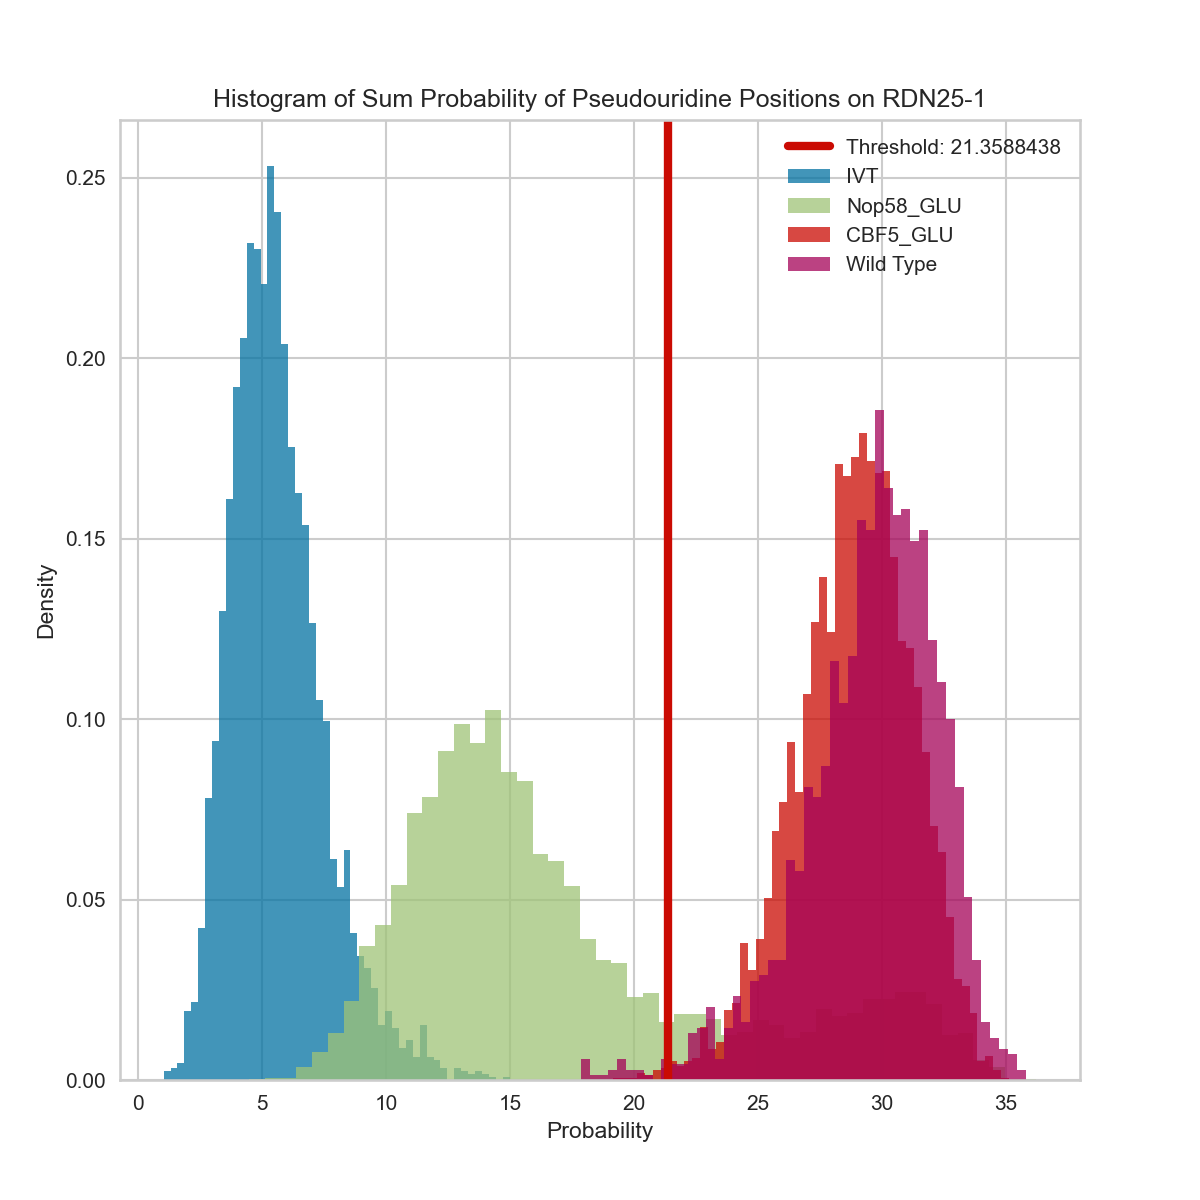

In [80]:
%matplotlib notebook
# the histogram of the data
fig = plt.figure(figsize=[8, 8])
panel1 = plt.axes([0.1, 0.1, .8, .8])
panel1.hist(ivt[positions].sum(axis=1), 50, density=True, alpha=0.75, label="IVT")    
panel1.hist(nop58_glu[positions].sum(axis=1), 50, density=True, alpha=0.75, label="Nop58_GLU")
panel1.hist(cbf5_glu[positions].sum(axis=1), 50, density=True, alpha=0.75, label="CBF5_GLU")
panel1.hist(native[positions].sum(axis=1), 50, density=True, alpha=0.75, label="Wild Type")

threshold = native[positions].sum(axis=1).sort_values()[int(len(native) * percentile)]
panel1.axvline(x = threshold, linewidth=4, color='r', label=f"Threshold: {threshold}")


plt.xlabel('Probability')
plt.ylabel('Density')
plt.title(f'Histogram of Sum Probability of Pseudouridine Positions on {contig}')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.legend()
plt.show()


In [15]:
if contig == "RDN25-1":
    threshold = 17
    threshold2 = 23
else:
    threshold = 7
    threshold2 = 8

threshold = ivt[pseduo_u_pos].sum(axis=1).sort_values()[int(len(ivt) * 0.99)]
print(threshold, threshold2)

total_pseudoU_prob = cbf5_glu[pseduo_u_pos].sum(axis=1)
high_confidence_depletions = total_pseudoU_prob[total_pseudoU_prob < threshold]
high_confidence_all_mod = total_pseudoU_prob[total_pseudoU_prob > threshold2]

read_ids = high_confidence_depletions.index.get_level_values(0)
print(len(high_confidence_depletions))
print(len(total_pseudoU_prob))
print(len(high_confidence_depletions) / len(total_pseudoU_prob))
print(len(high_confidence_all_mod) / len(total_pseudoU_prob))


7.790882699999999 23.41791996
1148
4715
0.24347826086956523
0.033722163308589605


In [131]:
# out_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/reference/depletion_read_ids/{contig}_cbf5_glu.txt"
# pd.DataFrame(read_ids).to_csv(out_path, header=False, index=False)      

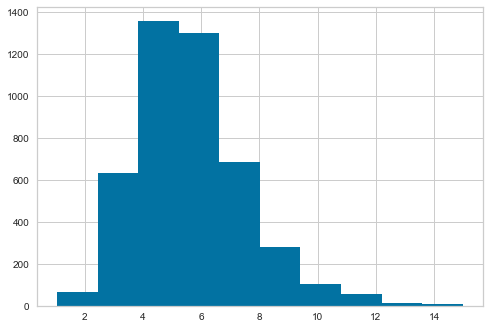

In [132]:
ivt[twoprimeo_pos].sum(axis=1).hist()

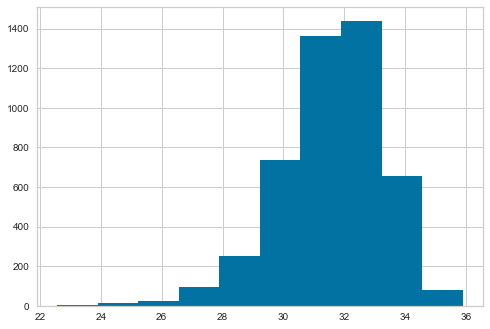

In [133]:
native[twoprimeo_pos].sum(axis=1).hist()

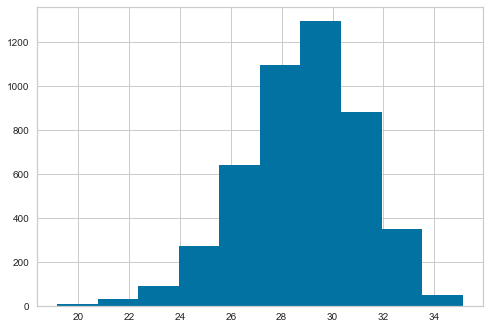

In [134]:
cbf5_glu[twoprimeo_pos].sum(axis=1).hist()

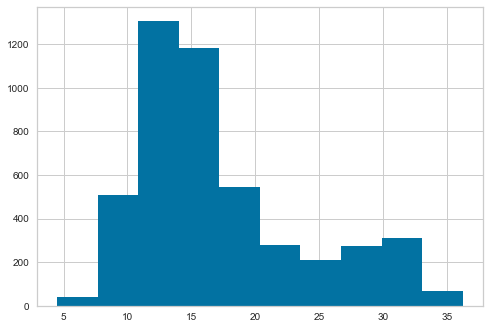

In [135]:
nop58_glu[twoprimeo_pos].sum(axis=1).hist()

In [142]:

if contig == "RDN25-1":
    threshold = 21
    threshold2 = 28
else:
    threshold = 10
    threshold2 = 13

threshold = ivt[twoprimeo_pos].sum(axis=1).sort_values()[int(len(ivt) * 0.9999)]
threshold2 = native[twoprimeo_pos].sum(axis=1).sort_values()[int(len(native) * 0.05)]
print(threshold, threshold2)
    
total_twoprimeo_prob = nop58_glu[twoprimeo_pos].sum(axis=1)
high_confidence_depletions = total_twoprimeo_prob[total_twoprimeo_prob < threshold]
high_confidence_all_mod = total_twoprimeo_prob[total_twoprimeo_prob > threshold2]

read_ids = high_confidence_depletions.index.get_level_values(0)
print(len(high_confidence_depletions))
print(len(total_twoprimeo_prob))
print(len(high_confidence_depletions) / len(total_twoprimeo_prob))
print(len(high_confidence_all_mod) / len(total_twoprimeo_prob))


14.988703399999999 28.523839000000002
2310
4723
0.4890959136142282
0.10819394452678383


In [107]:
out_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/reference/depletion_read_ids/{contig}_nop58_glu.txt"
pd.DataFrame(read_ids).to_csv(out_path, header=False, index=False)      

# Kmeans clustering for 2 clusters

In [93]:
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       

vc = VariantCall(cbf5_glu_psu_depletion_path)
list_18 = vc.get_contig_positions('RDN18-1')
list_25 = vc.get_contig_positions('RDN25-1')


In [94]:
contig = "RDN18-1"
pseduo_u_pos = pseduo_u_df[pseduo_u_df["contig"] == contig]["reference_index"].values
vc.positions_modification_plot_kmeans_clusters(list_18, max_number_clusters = 2, cluster_count=True, subunit_name = '18S') 

Data points in cluster0 :  3056
Data points in cluster1 :  1358


<IPython.core.display.Javascript object>

In [95]:
contig = "RDN25-1"
pseduo_u_pos = pseduo_u_df[pseduo_u_df["contig"] == contig]["reference_index"].values
vc.positions_modification_plot_kmeans_clusters(list_25, max_number_clusters = 2, cluster_count=True, subunit_name = '25S') 

Data points in cluster0 :  4201
Data points in cluster1 :  514


<IPython.core.display.Javascript object>

In [96]:
vc = VariantCall(nop58_glu_2o_depletion_path)


In [97]:
contig = "RDN18-1"
twoprimeo_pos = twoprimeo_df[twoprimeo_df["contig"] == contig]["reference_index"].values
vc.positions_modification_plot_kmeans_clusters(list_18, max_number_clusters = 2, cluster_count=True, subunit_name = '18S') 

Data points in cluster0 :  1836
Data points in cluster1 :  2595


<IPython.core.display.Javascript object>

In [98]:
contig = "RDN18-1"
twoprimeo_pos = twoprimeo_df[twoprimeo_df["contig"] == contig]["reference_index"].values
vc.positions_modification_plot_kmeans_clusters(list_25, max_number_clusters = 2, cluster_count=True, subunit_name = '18S') 

KeyboardInterrupt: 